In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("music.csv")

In [3]:
data.shape

(1000, 28)

In [4]:
data.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00000.wav,0.349943,1.935690,1784.420446,2002.650192,3806.485316,0.083066,-113.596742,121.557302,-19.158825,...,8.810668,-3.667367,5.751690,-5.162761,0.750947,-1.691937,-0.409954,-2.300208,1.219928,blues
1,blues.00001.wav,0.340983,-0.058070,1529.835316,2038.617579,3548.820207,0.056044,-207.556796,124.006717,8.930562,...,5.376802,-2.239119,4.216963,-6.012273,0.936109,-0.716537,0.293875,-0.287431,0.531573,blues
2,blues.00002.wav,0.363603,1.033480,1552.481958,1747.165985,3040.514948,0.076301,-90.754394,140.459907,-29.109965,...,5.789265,-8.905224,-1.083720,-9.218359,2.455805,-7.726901,-1.815724,-3.433434,-2.226821,blues
3,blues.00003.wav,0.404779,0.078957,1070.119953,1596.333948,2185.028454,0.033309,-199.431144,150.099218,5.647594,...,6.087676,-2.476420,-1.073890,-2.874777,0.780976,-3.316932,0.637981,-0.619690,-3.408233,blues
4,blues.00004.wav,0.308590,-8.457873,1835.494603,1748.362448,3580.945013,0.101500,-160.266031,126.198800,-35.605448,...,-2.806385,-6.934122,-7.558619,-9.173552,-4.512166,-5.453538,-0.924162,-4.409333,-11.703781,blues


In [5]:
data['label'].value_counts()

blues        100
rock         100
pop          100
country      100
hiphop       100
metal        100
classical    100
reggae       100
jazz         100
disco        100
Name: label, dtype: int64

In [6]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
data['label']= label_encoder.fit_transform(data['label']) 
data['filename']=label_encoder.fit_transform(data['filename'])  
data['label'].unique() 

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
X = data.drop('label', axis=1)
X= data.drop('filename',axis=1)
y = data['label']

In [8]:
X.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.349943,1.935690,1784.420446,2002.650192,3806.485316,0.083066,-113.596742,121.557302,-19.158825,42.351029,...,8.810668,-3.667367,5.751690,-5.162761,0.750947,-1.691937,-0.409954,-2.300208,1.219928,0
1,0.340983,-0.058070,1529.835316,2038.617579,3548.820207,0.056044,-207.556796,124.006717,8.930562,35.874684,...,5.376802,-2.239119,4.216963,-6.012273,0.936109,-0.716537,0.293875,-0.287431,0.531573,0
2,0.363603,1.033480,1552.481958,1747.165985,3040.514948,0.076301,-90.754394,140.459907,-29.109965,31.689014,...,5.789265,-8.905224,-1.083720,-9.218359,2.455805,-7.726901,-1.815724,-3.433434,-2.226821,0
3,0.404779,0.078957,1070.119953,1596.333948,2185.028454,0.033309,-199.431144,150.099218,5.647594,26.871927,...,6.087676,-2.476420,-1.073890,-2.874777,0.780976,-3.316932,0.637981,-0.619690,-3.408233,0
4,0.308590,-8.457873,1835.494603,1748.362448,3580.945013,0.101500,-160.266031,126.198800,-35.605448,22.153301,...,-2.806385,-6.934122,-7.558619,-9.173552,-4.512166,-5.453538,-0.924162,-4.409333,-11.703781,0


In [9]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

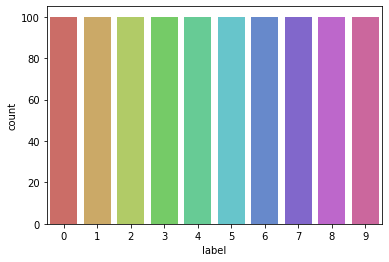

In [10]:
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.countplot(x='label' , data= data, palette = 'hls')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [12]:
#VALUE OF LAMBDA 0.1
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear',C=0.3)
svclassifier.fit(X_train, y_train)

SVC(C=0.3, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [13]:
y_pred = svclassifier.predict(X_test)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[18  0  0  0  0  0  0  0  0  0]
 [ 1 15  2  0  0  0  0  0  0  0]
 [ 1  2 20  2  0  0  0  0  0  0]
 [ 0  0  4 17  2  0  0  0  0  0]
 [ 0  0  0  2 21  0  0  0  0  0]
 [ 0  0  0  0  1 21  0  0  0  0]
 [ 0  0  0  1  2  1 17  0  0  0]
 [ 0  0  0  0  0  2  0 17  1  0]
 [ 0  0  0  0  0  0  0  1 11  0]
 [ 0  0  0  0  0  0  0  0  3 15]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       0.88      0.83      0.86        18
           2       0.77      0.80      0.78        25
           3       0.77      0.74      0.76        23
           4       0.81      0.91      0.86        23
           5       0.88      0.95      0.91        22
           6       1.00      0.81      0.89        21
           7       0.94      0.85      0.89        20
           8       0.73      0.92      0.81        12
           9       1.00      0.83      0.91        18

    accuracy                           0.86       200
   macro avg       

(10.0, 0.0)

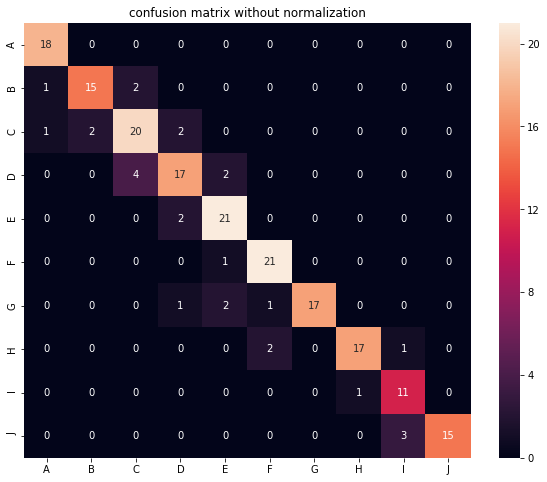

In [15]:
import numpy as np
from numpy import linalg as LA 
import seaborn as sn
confmat=confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(confmat , index = [i for i in "ABCDEFGHIJ"] , columns = [i for i in "ABCDEFGHIJ"])
plt.figure(figsize = (10,8))
plt.title('confusion matrix without normalization')
ax = sn.heatmap(df_cm, annot= True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [17]:
#VALUE OF LAMBDA 0.5
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear',C=0.5)
svclassifier.fit(X_train, y_train)

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [18]:
y_pred = svclassifier.predict(X_test)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[23  0  2  0  0  0  0  0  0  0]
 [ 0 22  2  0  0  0  0  0  0  0]
 [ 0  0 15  1  0  0  0  0  0  0]
 [ 0  0  2 18  2  0  0  0  0  0]
 [ 0  0  0  4 18  1  0  0  0  0]
 [ 0  0  0  2  2 17  0  0  0  0]
 [ 0  0  0  0  1  0 15  0  0  0]
 [ 0  0  0  0  0  1  0 10  7  0]
 [ 0  0  0  0  0  0  0  1 17  1]
 [ 0  0  0  0  0  0  0  0  0 16]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        25
           1       1.00      0.92      0.96        24
           2       0.71      0.94      0.81        16
           3       0.72      0.82      0.77        22
           4       0.78      0.78      0.78        23
           5       0.89      0.81      0.85        21
           6       1.00      0.94      0.97        16
           7       0.91      0.56      0.69        18
           8       0.71      0.89      0.79        19
           9       0.94      1.00      0.97        16

    accuracy                           0.85       200
   macro avg       

(10.0, 0.0)

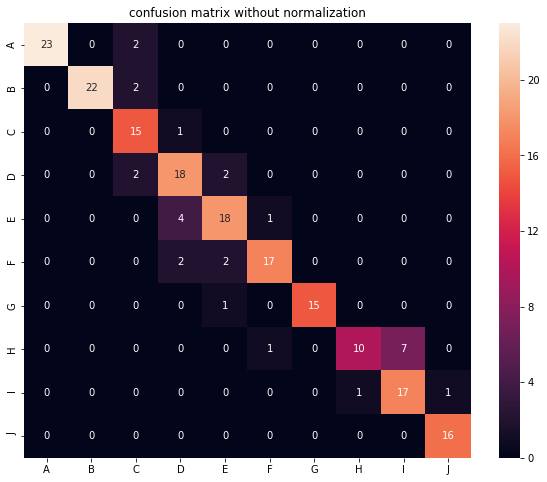

In [20]:
import numpy as np
from numpy import linalg as LA 
import seaborn as sn
confmat=confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(confmat , index = [i for i in "ABCDEFGHIJ"] , columns = [i for i in "ABCDEFGHIJ"])
plt.figure(figsize = (10,8))
plt.title('confusion matrix without normalization')
ax = sn.heatmap(df_cm, annot= True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [22]:
#VALUE OF LAMBDA 0.75
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear',C=0.75)
svclassifier.fit(X_train, y_train)

SVC(C=0.75, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [23]:
y_pred = svclassifier.predict(X_test)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[21  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0]
 [ 1  0 17  1  0  0  0  0  0  0]
 [ 0  0  0 19  2  0  0  0  0  0]
 [ 0  0  0  2 15  0  0  0  0  0]
 [ 0  0  0  0  1 19  0  0  0  0]
 [ 0  0  0  0  3  0 22  0  0  0]
 [ 0  0  0  0  0  0  0 10  3  0]
 [ 0  0  0  0  0  0  0  1 21  2]
 [ 0  0  0  0  0  0  0  0  0 20]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      1.00      1.00        20
           2       1.00      0.89      0.94        19
           3       0.86      0.90      0.88        21
           4       0.71      0.88      0.79        17
           5       1.00      0.95      0.97        20
           6       1.00      0.88      0.94        25
           7       0.91      0.77      0.83        13
           8       0.88      0.88      0.88        24
           9       0.91      1.00      0.95        20

    accuracy                           0.92       200
   macro avg       

(10.0, 0.0)

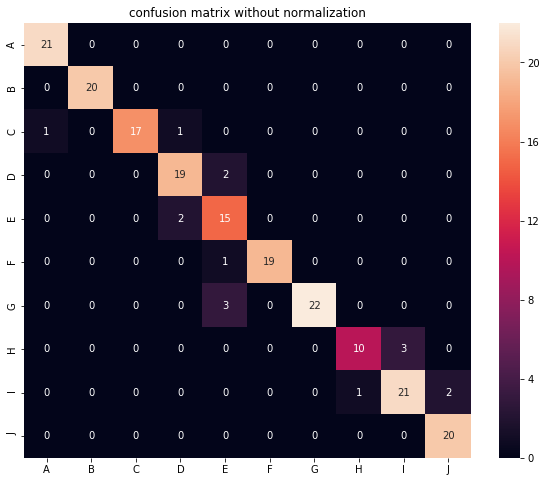

In [25]:
import numpy as np
from numpy import linalg as LA 
import seaborn as sn
confmat=confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(confmat , index = [i for i in "ABCDEFGHIJ"] , columns = [i for i in "ABCDEFGHIJ"])
plt.figure(figsize = (10,8))
plt.title('confusion matrix without normalization')
ax = sn.heatmap(df_cm, annot= True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [27]:
#VALUE OF LAMBDA 1
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear',C=1)
svclassifier.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [28]:
y_pred = svclassifier.predict(X_test)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[21  0  0  0  0  0  0  0  0  0]
 [ 0 21  1  0  0  0  0  0  0  0]
 [ 1  2 13  1  0  0  0  0  0  0]
 [ 0  0  1 22  0  0  0  0  0  0]
 [ 0  0  0  0 18  0  0  0  0  0]
 [ 0  0  0  0  2 16  0  0  0  0]
 [ 0  0  0  0  3  1 26  0  0  0]
 [ 0  0  0  0  0  1  0 12  0  0]
 [ 0  0  0  0  0  0  0  0 12  2]
 [ 0  0  0  0  0  0  0  1  7 16]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       0.91      0.95      0.93        22
           2       0.87      0.76      0.81        17
           3       0.96      0.96      0.96        23
           4       0.78      1.00      0.88        18
           5       0.89      0.89      0.89        18
           6       1.00      0.87      0.93        30
           7       0.92      0.92      0.92        13
           8       0.63      0.86      0.73        14
           9       0.89      0.67      0.76        24

    accuracy                           0.89       200
   macro avg       

(10.0, 0.0)

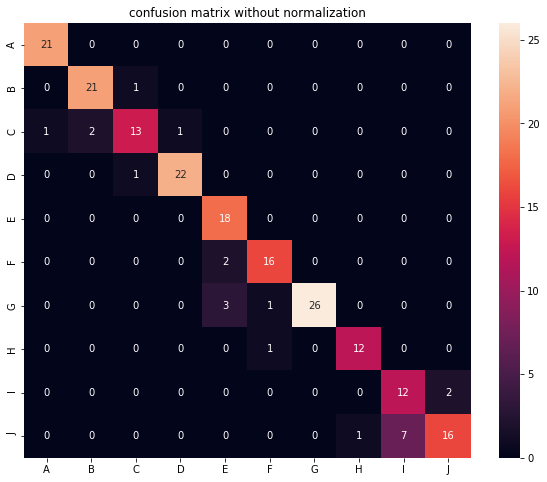

In [30]:
import numpy as np
from numpy import linalg as LA 
import seaborn as sn
confmat=confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(confmat , index = [i for i in "ABCDEFGHIJ"] , columns = [i for i in "ABCDEFGHIJ"])
plt.figure(figsize = (10,8))
plt.title('confusion matrix without normalization')
ax = sn.heatmap(df_cm, annot= True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

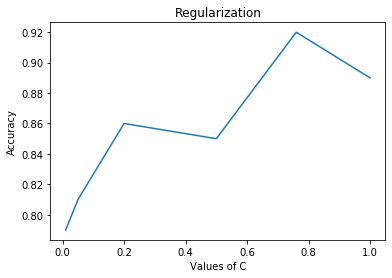

In [32]:
# importing the required module 
import matplotlib.pyplot as plt 
  
# x axis values 
x = [0.01,0.05,0.2,0.5,0.76,1] 
# corresponding y axis values 
y = [0.79,0.81,0.86,0.85,0.92,0.89] 
  
# plotting the points  
plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('Values of C') 
# naming the y axis 
plt.ylabel('Accuracy') 
  
# giving a title to my graph 
plt.title('Regularization') 
  
# function to show the plot 
plt.show() 